# Part 1: Loading and Preparing Our Data

In [1]:
% matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Our data file was in a zipfile format.
# Here we are unzipping and loading data within Python.

from zipfile import ZipFile

with ZipFile('ml-100k.zip', 'r') as ratings2:
   # Extract all the contents of zip file in current directory
    ratings2.extractall()

In [3]:
ratings2=pd.read_csv( './ml-100k/u.data', 
                    sep="\t", 
                    names=["user_id","item_id","rating","timestamp"]) #\t because TAB separated
                    
ratings2.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
#this code flips the ratings dataset, making the dataset easier to manage.
ratings=ratings2.pivot(index="user_id", columns="item_id", values="rating")

In [5]:
ratings.head(3)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
users=pd.read_csv('./ml-100k/u.user', 
                  sep="|", 
                  names=["user_id", "age", "gender","occupation","zip_code"], index_col="user_id")
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [7]:
films=pd.read_csv('./ml-100k/u.item', 
                  sep="|", 
                  names=["movie id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action","Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"], index_col="movie id", encoding="latin1")
films.head()

,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
#prints out titles of movies as a list

titleslist=films['movie_title'].values
print(titleslist)

['Toy Story (1995)' 'GoldenEye (1995)' 'Four Rooms (1995)' ...
 'Sliding Doors (1998)' 'You So Crazy (1994)'
 'Scream of Stone (Schrei aus Stein) (1991)']


# Part 2: Visualizing Our Data 

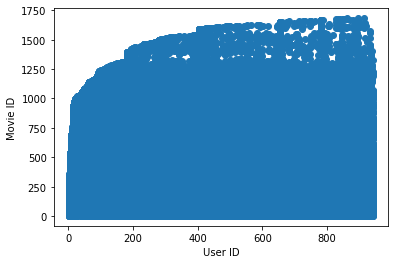

In [9]:
#Whether a user rated a certain movie
plt.scatter(ratings2['user_id'],ratings2['item_id'])
plt.xlabel('User ID')
plt.ylabel('Movie ID')
plt.show()

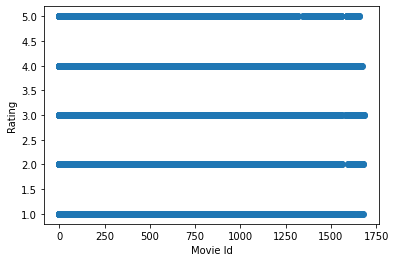

In [10]:
# Shows all of the ratings a specific Movie Received
plt.scatter(ratings2['item_id'], ratings2['rating'])
plt.xlabel('Movie Id')
plt.ylabel('Rating')
plt.show()

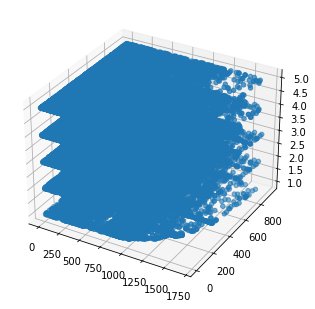

In [11]:
# What each user rated each movie

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)

xs=ratings2['item_id'].values
ys=ratings2['user_id'].values
zs=ratings2['rating'].values

ax.scatter(xs, ys, zs)
plt.show()

# Part 3: Determining the User's Genre Interests

In [12]:
#DEMO!!!
#here we ask for the user to input their rating for 5 randomly generated movie (from the previous list of movies)
#if the movie is unknown (when the user inputs "0"), it is not added to the list and another randomly selected movie is generated.
#the movies that were rated are all added to a list
import random
print("Please rate each movie on a scale of 1 to 5 stars (only input whole number).")
print("If you do not know the movie, write '0'")
print("    ")

ratingList = []
movieList=[]
randomList=[]
reiterate = 5
z = 0
while z < reiterate:
    while True:
        z += 1
        rand1 = random.randint(1,1683)
        movieInputPrint = titleslist[rand1+1]
        rating1 = input(movieInputPrint)
        if rating1 == "0":
            reiterate += 1
            break
        ratingList.append(rating1)
        movieList.append(movieInputPrint)
        randomList.append(rand1)
        if rating1 != '0':
            break
print(ratingList, movieList)

Please rate each movie on a scale of 1 to 5 stars (only input whole number).
If you do not know the movie, write '0'
    
Andre (1994)3
Lawnmower Man 2: Beyond Cyberspace (1996)2
1-900 (1994)5
Penny Serenade (1941)4
Nutty Professor, The (1996)5
['3', '2', '5', '4', '5'] ['Andre (1994)', 'Lawnmower Man 2: Beyond Cyberspace (1996)', '1-900 (1994)', 'Penny Serenade (1941)', 'Nutty Professor, The (1996)']


In [13]:
#more lists of the binary values for each genre
unknown=films['unknown'].values
action=films['Action'].values
adventure=films['Adventure'].values
animation=films['Animation'].values
childrens=films["Children's"].values
comedy=films['Comedy'].values
crime=films['Crime'].values
documentary=films['Documentary'].values
drama=films['Drama'].values
fantasy	=films['Fantasy'].values
filmnoir=films['Film-Noir'].values
horror=films['Horror'].values
musical=films['Musical'].values
mystery=films['Mystery'].values
romance=films['Romance'].values
scifi=films['Sci-Fi'].values
thriller=films['Thriller'].values
war	=films['War'].values
western=films['Western'].values

genre = [unknown, action, adventure, animation, childrens, comedy, crime, documentary, drama, fantasy, filmnoir, horror, musical, mystery, romance, scifi, thriller, war, western] 
genrenames = ['unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']

In [14]:
#here we extract the genres that each randomly selected movie falls into.
genrenames = ['unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western'] 
loop = 0
loop4=0
moviegenres=[]
genrevalues=[]
genrevalues1=[]
genrevalues2=[]
genrevalues3=[]
genrevalues4=[]
genrevalues5=[]

moviegenres1=[]
moviegenres2=[]
moviegenres3=[]
moviegenres4=[]
moviegenres5=[]

#looking at the list of the randomly selected movie IDs, we index to the movie ID in each genre list, check for a "1" (is the genre) or a "0" (is not),...
#..., and records the results in another list 

for g in randomList:
    loop4 +=1
    for x in genre:
        loop = 0
        a=x[g+1]
        if loop4==1:
            genrevalues1.append(a)
        elif loop4==2:
            genrevalues2.append(a)
        elif loop4==3:
            genrevalues3.append(a)
        elif loop4==4:
            genrevalues4.append(a)
        else:
            genrevalues5.append(a)
      
      
genrevalues=[genrevalues1,genrevalues2,genrevalues3,genrevalues4,genrevalues5]


for x in genrevalues:
    loop+=1
    loop2=0
    for u in x:
        loop2+=1
        if u==1:
            if loop==1:
                moviegenres1.append(genrenames[loop2-1])
            elif loop==2:
                moviegenres2.append(genrenames[loop2-1])
            elif loop==3:
                moviegenres3.append(genrenames[loop2-1])
            elif loop==4:
                moviegenres4.append(genrenames[loop2-1])
            elif loop==5:
                moviegenres5.append(genrenames[loop2-1])
        
moviegenres=[moviegenres1, moviegenres2, moviegenres3, moviegenres4, moviegenres5]
print(moviegenres)

[['adventure', 'childrens'], ['scifi', 'thriller'], ['romance'], ['drama', 'romance'], ['comedy', 'fantasy', 'romance', 'scifi']]


In [15]:
#We find the frequency of certain genres in the randomly selected movies

#the list is then compressed into a dictionary that contains the genres (keys) and how many times the genre appears in the above list (values)

moviefreq = {
    'unknown':0, 
    'action':0, 
    'adventure':0,
    'animation':0,
    'childrens':0,
    'comedy':0,
    'crime':0,
    'documentary':0,
    'drama':0, 
    'fantasy':0,
    'filmnoir':0,
    'horror':0,
    'musical':0,
    'mystery':0,
    'romance':0,
    'scifi':0,
    'thriller':0,
    'war':0,
    'western':0
}

#we add to the values of the dictionary above, depending on how many times a genre name is found

for w in moviegenres:
    for c in w:
        moviefreq[c]=moviefreq[c]+1
print(moviefreq)

{'unknown': 0, 'action': 0, 'adventure': 1, 'animation': 0, 'childrens': 1, 'comedy': 1, 'crime': 0, 'documentary': 0, 'drama': 1, 'fantasy': 1, 'filmnoir': 0, 'horror': 0, 'musical': 0, 'mystery': 0, 'romance': 3, 'scifi': 2, 'thriller': 1, 'war': 0, 'western': 0}


In [16]:
#using the ratings that the user inputed before, we add weights (the rating) to the genre of that movie
# This helps us find the user's favorite genre (based off of the movies we generated)

# Movie Preference Rating
moviepref = {
    'unknown':0, 
    'action':0, 
    'adventure':0,
    'animation':0,
    'childrens':0,
    'comedy':0,
    'crime':0,
    'documentary':0,
    'drama':0, 
    'fantasy':0,
    'filmnoir':0,
    'horror':0,
    'musical':0,
    'mystery':0,
    'romance':0,
    'scifi':0,
    'thriller':0,
    'war':0,
    'western':0
}

ratingListint=map(int, ratingList)
  
for b,j in zip(moviegenres,ratingListint):
    for i in b:
        moviepref[i]=moviepref[i]+j

movieaverage=dict()
values=list(moviepref.values())
keys=list(moviepref.keys())


for i in keys:
    if moviepref[i]>0:
        o=moviepref[i]/moviefreq[i]
        movieaverage.update({i:o})
    
print(movieaverage)

import operator
max(movieaverage, key=movieaverage.get)

{'adventure': 3.0, 'childrens': 3.0, 'comedy': 5.0, 'drama': 4.0, 'fantasy': 5.0, 'romance': 4.666666666666667, 'scifi': 3.5, 'thriller': 2.0}


'comedy'

# Part 4: Narrowing User List by Age and Gender

In [19]:
#creating a list that holds all of the users' genders, ages, and UserIDs.

gendersUsers=users['gender'].values
agesUsers=users['age'].values
userids=range(0,942)

#turning the age of the users into an integer (previously stored as a string)

for i in range(0, len(agesUsers)): 
    agesUsers[i] = int(agesUsers[i])
    
genderandage=[]

#create a larger list ("genderandage")
#stores the user's gender, age, and ID
#the list starts with user with the ID 0

for j,h,b in zip(gendersUsers, agesUsers, userids):
    genderandage.append(j)
    genderandage.append(h)
    genderandage.append(b)

#print(genderandage)

In [20]:
#DEMO!!!
#Filtering out people with different gender

genderTrue = []

#here we ask for the user to input a gender

genderInput = input("What is your gender? ")

#because we don't want to look at the user's age or ID, we skip through the "genderandage" list and only look at the gender.
#if the gender of the database's user is the same as the inputted age, we add it to another list.

for m in range(0, 942):
    z=m*3
    if genderandage[z]==genderInput:
        q=genderandage[z+1]
        r=genderandage[z+2]
        genderTrue.append(q)
        genderTrue.append(r)

#a list ("genderTrue") now holds all the ages and user IDs of the inputted gender.

#print(genderTrue)

What is your gender? M


In [21]:
#DEMO!!!
# Age Filter (prints user id of person with same gender and age group)

#ask the user for their age

ageInput = int(input("What is your age? "))

sevenNine = []
tenNine = []
twentyNine = []
thirtyNine = []
fortyNine = []
fiftyNine = []
sixtyUp = []


if genderInput=='F':
    rang = 273
elif genderInput == 'M':
    rang = 668

p = 0
m = 0

#depending on what gender was inputted before, we sort those IDs into lists that hold a certain age group
#7-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60+

while p <= rang:
    p=m*2
    m += 1
    if genderTrue[p] <= 9:
        sevenNine.append(genderTrue[p+1])
    elif genderTrue[p] <= 19:
        tenNine.append(genderTrue[p+1])
    elif genderTrue[p] <= 29:
        twentyNine.append(genderTrue[p+1])
    elif genderTrue[p] <= 39:
        thirtyNine.append(genderTrue[p+1])
    elif genderTrue[p] <= 49:
        fortyNine.append(genderTrue[p+1])
    elif genderTrue[p] <= 59:
        fiftyNine.append(genderTrue[p+1])
    else:
        sixtyUp.append(genderTrue[p+1])

What is your age? 38


In [22]:
#depending on the inputted age, we create a new list that only stores the IDs of the people of the same age group (and the same gender)

if ageInput <= 9:
    agegroup = sevenNine
elif ageInput <= 19:
    agegroup = tenNine
elif ageInput <= 29:
    agegroup = twentyNine
elif ageInput <= 39:
    agegroup = thirtyNine
elif ageInput <= 49:
    agegroup = fortyNine
elif ageInput <= 59:
    agegroup = fiftyNine
else:
    agegroup = sixtyUp

print(agegroup)

[7, 16, 24, 27, 39, 40, 41, 54, 60, 62, 63, 70, 73, 76, 83, 91, 94, 99, 101, 106, 111, 114, 118, 123, 124, 126, 133, 144, 147, 166, 181, 182, 183, 188, 189, 190, 193, 198, 206, 209, 212, 214, 217, 218, 219, 232, 234, 238, 241, 242, 271, 274, 278, 287, 293, 294, 309, 310, 314, 318, 330, 333, 336, 338, 345, 349, 370, 373, 377, 379, 380, 384, 385, 386, 387, 401, 402, 410, 414, 418, 429, 439, 442, 446, 451, 464]


# Part 5: Outputting Top-Rated Movies from User's Favorite Genre

In [26]:
itemID=[]
itemid=range(943)
allmovies=[]
allratings=[]
loop5=0

#for the specific age/gender group, we look at what movies these specific users watched and what they rated those movies

for i in agegroup:
    w=ratings.iloc[i].values
    loop5=0
    for r in w:
        loop5+=1
        if r==1 or r==2 or r==3 or r==4 or r==5:
            allmovies.append(loop5)
            allratings.append(r)
#print(allmovies)
#print(allratings)

In [27]:
#the two lists are put into a dictionary that shows the movie ID and how many times it was rated.

freqratingsnew = dict()

for a in allmovies:
    if a in freqratingsnew:
        freqratingsnew[a]=freqratingsnew[a]+1
    else: 
        freqratingsnew[a] = 1

#print(freqratingsnew)

In [28]:
# This finds the total sum of ratings across users
totalratingsnew = dict()
loop6=0

for a in allmovies:
    loop6+=1
    if a in totalratingsnew:
        totalratingsnew[a]=totalratingsnew[a]+allratings[loop6-1]
    else: 
        totalratingsnew[a] = allratings[loop6-1]

#print(totalratingsnew)

In [29]:
#the movie's ratings are all averaged out to see the average rating for each movie across the user List.

moviewatchaverage=dict()
values2=list(totalratingsnew.values())
keys2=list(totalratingsnew.keys())

for s in keys2:
    l=totalratingsnew[s]/freqratingsnew[s]
    moviewatchaverage.update({s:l})
#print(moviewatchaverage)

In [32]:
values3 = list(moviewatchaverage.values())
keys3 = list(moviewatchaverage.keys())

values3List = []
values3ListOrdered = []

for z,q in zip(values3,keys3):
    values3List.append(z)
    values3List.append(q)


#order the values (values3) then reference the same index (x) in keys3

z = 0
for x in values3:
    y = x * 2
    z += 1 
    val = max(values3)
    m = values3.index(val)
    values3ListOrdered.append(val)
    values3ListOrdered.append(keys3[m])
    keys3.remove(keys3[m])
    values3.remove(val)

#print()  
#print(values3ListOrdered)
finalList = []
y = 0
for x in values3ListOrdered:
    if x > 5.0:
        finalList.append(x)

#print(finalList)

In [35]:
#using the "finalList" from above (movie IDs), a list of the highest-rated movies from that age/gender group is printed

finalList2 = []
movienamestable=films['movie_title'].values
moviename=[]
for i,j in zip(finalList,finalList):
    v=films.loc[i, 'movie_title']
    finalList2.append(v)


#print(finalList2)

In [36]:
#the list of the movie IDs are all combined into one big list
movieG = max(movieaverage, key=movieaverage.get)
if movieG=="unknown":
    movieG2=movieG
elif movieG=="childrens":
    movieG2="Children's"
elif movieG=="filmnoir":
    movieG2=="Film-Noir"
elif movieG=="scifi":
    movieG2=="Sci-Fi"
else:
    movieG2=movieG.capitalize()

favoriteMovieGenre = films[movieG2].values
print(favoriteMovieGenre)

z = []
for i in finalList:
    y = favoriteMovieGenre[i-1]
    z.append(y)

#print(z)

[1 0 0 ... 0 1 0]


In [37]:
loop=0
names=[]

#the list of the movie IDs above is then compared to the list that holds the original favorite movie genre of the user.
#if the lists are similar (if they both have a value of "1" in the same position), the movie has this favorite movie genre.
#the movies that have the genre are then put into another list as their movie titles.

for b in z:
    loop+=1
    if b==1:
        c=finalList2[loop-1]
        names.append(c)
    
#print(names)

In [38]:
#the list of movies is printed out.
#these movies are listed from highest-rated to lowest-rated
#they are rated by people of the user's age and gender
#these movies also share the same genre as the user's assumed favorite genre (determined by the 5 randomly generated movies from before).
#other age and gender groups may not have rated these movies the same way.

count=0

for i in names:
    while count<len(names):
        count+=1
        print(count, "-", names[count-1])

1 - Sum of Us, The (1994)
2 - Top Hat (1935)
3 - Mallrats (1995)
4 - Santa with Muscles (1996)
5 - Indian Summer (1996)
6 - Ma vie en rose (My Life in Pink) (1997)
7 - Grand Day Out, A (1992)
8 - Philadelphia Story, The (1940)
9 - Close Shave, A (1995)
10 - Charade (1963)
11 - Bringing Up Baby (1938)
12 - Ruling Class, The (1972)
13 - Grosse Fatigue (1994)
14 - North by Northwest (1959)
15 - Monty Python and the Holy Grail (1974)
16 - In the Bleak Midwinter (1995)
17 - Big Lebowski, The (1998)
18 - Living in Oblivion (1995)
19 - As Good As It Gets (1997)
20 - Great Dictator, The (1940)
21 - Flirting With Disaster (1996)
22 - Apartment, The (1960)
23 - Cinema Paradiso (1988)
24 - Kolya (1996)
25 - Cool Hand Luke (1967)
26 - Wrong Trousers, The (1993)
27 - Wings of Desire (1987)
28 - Sting, The (1973)
29 - Roman Holiday (1953)
30 - Raising Arizona (1987)
31 - Princess Bride, The (1987)
32 - Muriel's Wedding (1994)
33 - Rosencrantz and Guildenstern Are Dead (1990)
34 - This Is Spinal Tap 